# 📱 Análise de Engajamento no Instagram (Base de Dados de Exemplo)

Este notebook apresenta uma análise exploratória de uma base de dados fictícia sobre postagens no Instagram. O objetivo é identificar padrões de engajamento com base no tipo de conteúdo, horário e dia da semana.

> ⚠️ A base foi fornecida em um curso e **não está associada a nenhuma marca ou empresa real**.

## 📌 Etapas da análise:
- Importação e visualização dos dados
- Análise por tipo de publicação
- Engajamento por horário e dia da semana
- Conclusões

## 📥 Leitura e visualização dos dados

# Analisando o engajamento do Instagram

### O que queremos responder?
- Qual tipo de conteúdo **mais engaja** no Instagram da minha empresa?
<br><br>
- Temos a base de dados do Instagram **desde que o usuário começou a postar na marca até o dia 27/março**
<br><br>
- Ele também dá alguns direcionamentos:
    - Podem ignorar a coluna visualizações, queremos entender apenas curtidas, comentários e interações
    - Tags vazias é que realmente não possuem tag (favor tratar como vazio)

### Vamos importar e visualizar a nossa base

In [ ]:
# Importando o pandas
import pandas as pd


In [ ]:
# Importar a base em excel
# - Base: 08. Analisando o engajamento no Instagram.xlsx
df=pd.read_excel('08. Analisando o engajamento no Instagram.xlsx')

In [ ]:
# Visualizando as 5 primeiras linhas
df.head()

,Tipo,Data,Curtidas,Comentários,Visualizações,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,NaN,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,NaN,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,NaN,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,82878.0,Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,NaN,Produtos,S,N,NaN,4437


### Como ele pediu para não considerar a coluna visualizações, vamos retirar essa coluna da base

**O .drop() permite apagar uma coluna ou linha da base:** <br>
base<font color="blue">**.drop(**</font>nome_coluna,axis=1<font color="blue">**)**</font>
- O axis = 1 se refere a coluna, enquanto axis = 0 se refere a linha
- Devemos passar o nome da coluna que queremos apagar da base
- Em caso de mais de 1 coluna, passamos a lista entre colchetes

In [ ]:
# Apagando a coluna "Visualizações"
df=df.drop("Visualizações",axis=1)

In [ ]:
# Visualizando novamente as 5 primeiras linhas
df.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,NaN,4437


In [ ]:
# Visualizando as 5 últimas linhas
df.tail()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
47,IGTV,2022-03-12,5489,77,Dicas de como usar/Novos Produtos,S,N,NaN,5566
48,Foto,2022-03-20,29084,479,Datas comemorativas/Promoções,S,S,NaN,29563
49,Foto,2022-03-22,9087,106,NaN,S,S,NaN,9193
50,Foto,2022-03-26,16551,186,NaN,S,N,NaN,16737
51,IGTV,2022-03-27,4934,65,Dicas de como usar/Produtos,S,N,NaN,4999


In [ ]:
# Tamanho da base
df.shape

(52, 9)

In [ ]:
# Verificando as informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Tipo         52 non-null     object        
 1   Data         52 non-null     datetime64[ns]
 2   Curtidas     52 non-null     int64         
 3   Comentários  52 non-null     int64         
 4   Tags         44 non-null     object        
 5   Pessoas      52 non-null     object        
 6   Campanhas    52 non-null     object        
 7   Carrossel    8 non-null      object        
 8   Interacoes   52 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 3.8+ KB


### Carrossel possui apenas 8 valores não nulos
- Vamos entender os valores de carrossel

In [ ]:
# Contando os valores que aparecem na coluna Carrossel
df["Carrossel"].value_counts()

,count
Carrossel,
S,8


- Na verdade, os valores nulos são de postagens que não são carrossel. Sendo assim o nulo deveria ser "N"

### Tratando os valores nulos

In [ ]:
# Filtrando os valores em que carrossel é nulo
df[df["Carrossel"].isnull()]

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,NaN,4437
6,Foto,2021-09-19,21597,852,Novos Produtos,S,S,NaN,22449
7,Foto,2021-09-25,6346,33,Produtos,N,S,NaN,6379
9,Vídeo,2021-09-28,4056,81,Produtos,N,N,NaN,4137
10,Reels,2021-10-10,12894,249,Trends/Produtos,S,N,NaN,13143
11,Foto,2021-10-12,17831,391,NaN,S,S,NaN,18222


In [ ]:
# Buscando valores que NAO sao nulos
df[df["Carrossel"].notnull()]

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
5,Foto,2021-09-17,5359,62,Novos Produtos,N,S,S,5421
8,Foto,2021-09-27,6355,89,Produtos,S,N,S,6444
12,Foto,2021-10-21,6166,55,Novos Produtos,S,S,S,6221
21,Foto,2021-12-23,8328,93,Produtos,S,N,S,8421
25,Foto,2022-01-02,12193,138,Novos Produtos,S,N,S,12331
26,Foto,2022-01-08,24585,354,Datas comemorativas,S,S,S,24939
28,Foto,2022-01-15,9936,119,Novos Produtos,S,N,S,10055
40,Foto,2022-02-21,21621,213,Influenciadores,S,S,S,21834


In [ ]:
# Selecionando apenas a coluna Carrossel
df["Carrossel"]

,Carrossel
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,S
6,NaN
7,NaN
8,S
9,NaN


In [ ]:
# Agora vamos atribuir o valor N para essa coluna
df.loc[df["Carrossel"].isnull(),"Carrossel"]="N"

**Verificando novamente os valores de Carrossel:**

In [ ]:
# Verificando novamente os valores dessa coluna
df["Carrossel"].value_counts()

,count
Carrossel,
N,44
S,8


### Mostrando as informações estatísticas

In [ ]:
# Descrição estatística da base
df.describe()

,Data,Curtidas,Comentários,Interacoes
count,52,52.000000,52.000000,52.000000
mean,2021-12-23 04:36:55.384615424,12262.730769,189.500000,12452.230769
min,2021-09-11 00:00:00,2807.000000,9.000000,2816.000000
25%,2021-10-23 06:00:00,5492.000000,69.500000,5562.500000
50%,2022-01-05 00:00:00,9603.000000,128.000000,9773.500000
75%,2022-02-15 12:00:00,17621.750000,265.250000,17920.750000
max,2022-03-27 00:00:00,37351.000000,852.000000,37853.000000
std,NaN,8165.875326,170.687709,8299.390088


### Visualizando essas informações de maneira gráfica

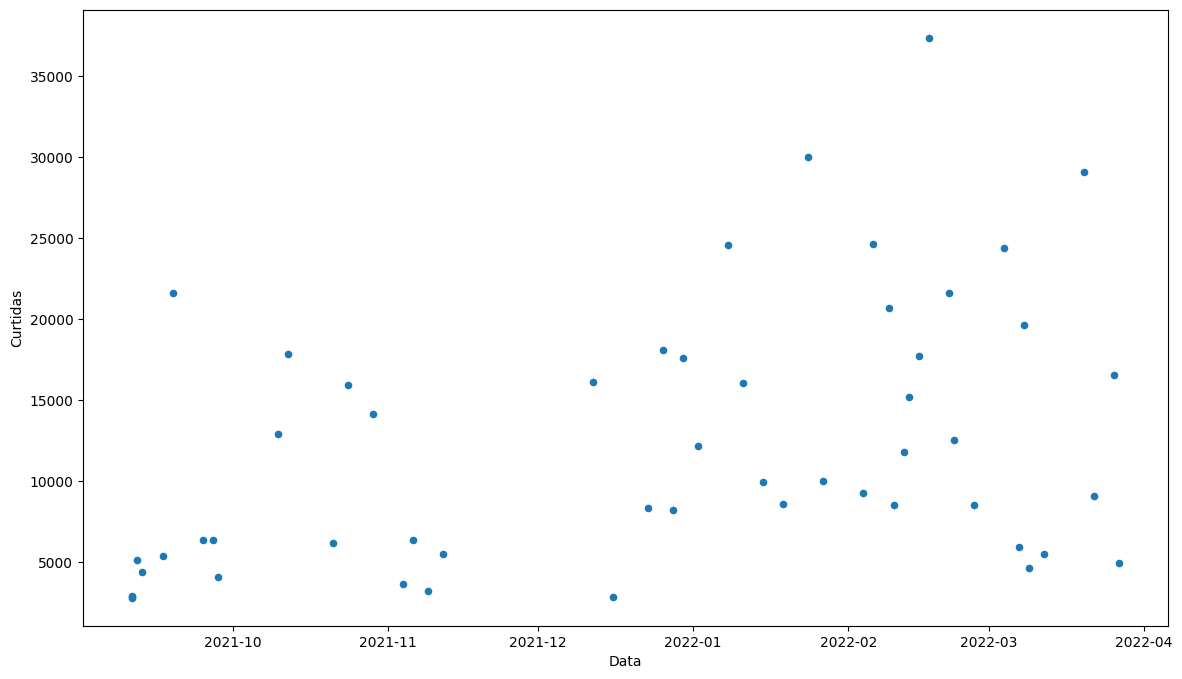

In [ ]:
# Um gráfico de dispersão ajudaria a entender melhor as curtidas e comentários
df.plot(kind="scatter",x="Data",y="Curtidas",figsize=(14,8));

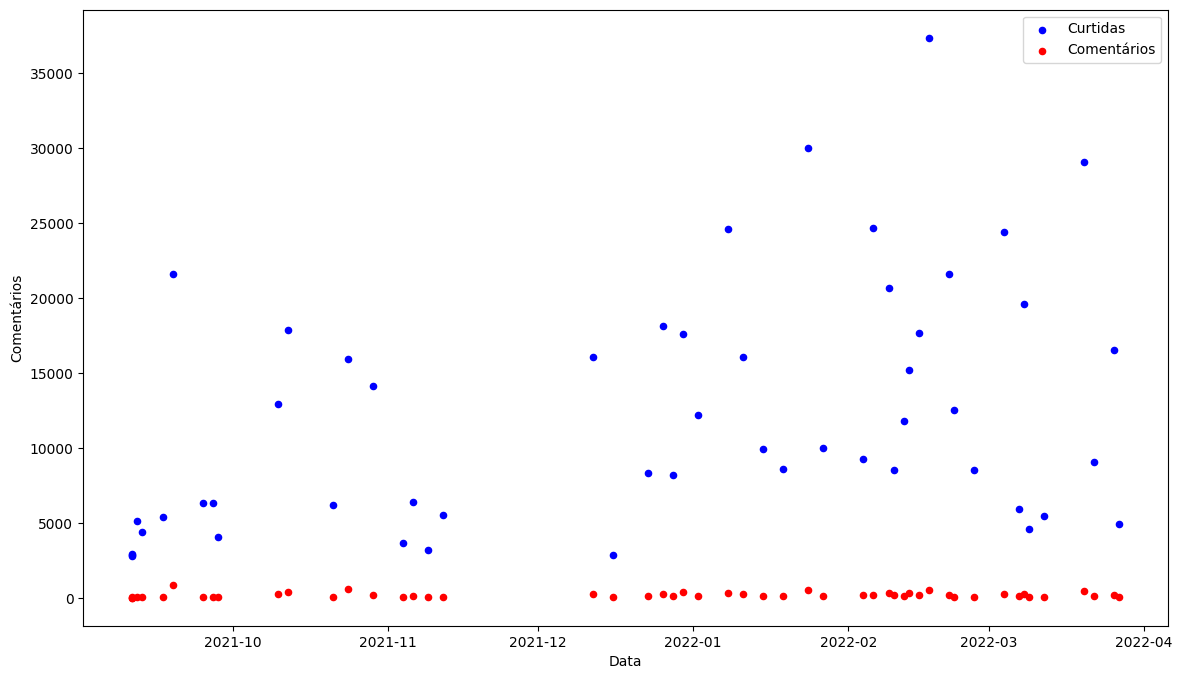

In [ ]:
# Podemos colocar curtidas e comentários no mesmo gráfico
ax = df.plot(kind="scatter",x="Data",y="Curtidas",color="blue",label="Curtidas",figsize=(14,8));
df.plot(kind="scatter",x="Data",y="Comentários",color="red",label="Comentários",figsize=(14,8),ax=ax);

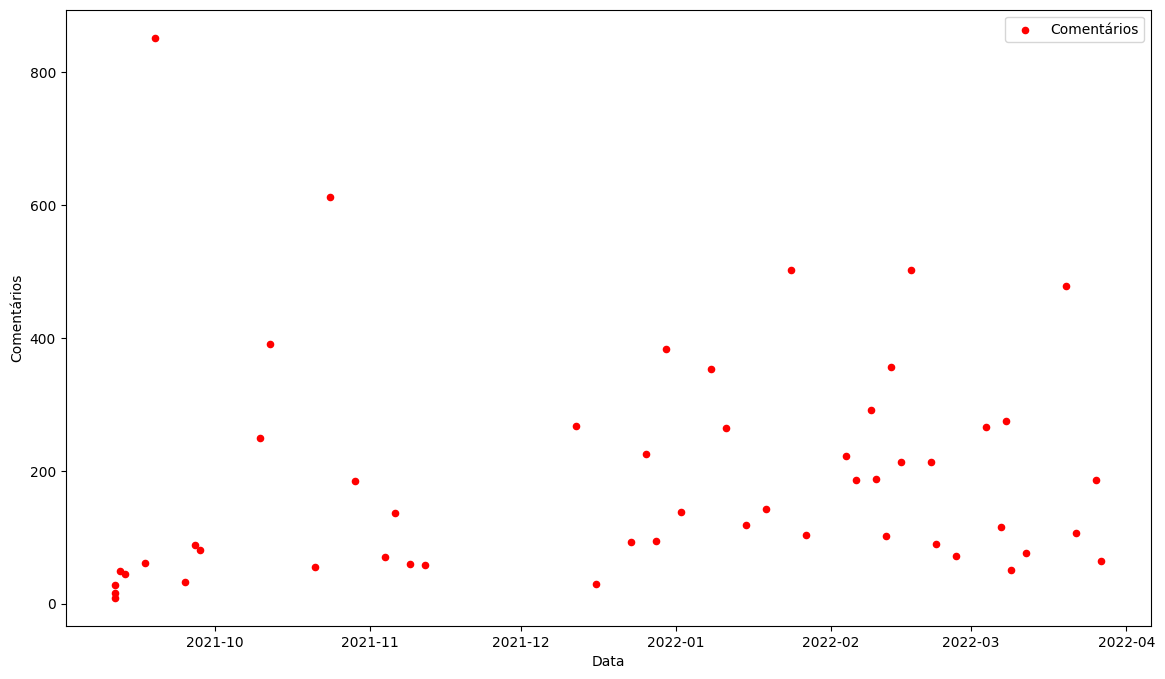

In [ ]:
# A escala de curtidas pode estar atrapalhando a visualização, por isso vamos deixar comentários em um gráfico separado
df.plot(kind="scatter",x="Data",y="Comentários",color="red",label="Comentários",figsize=(14,8));

- O gráfico e as informações estatítiscas não estão dizendo muita coisa pois existe uma grande dispersão entre curtidas e comentários
- Precisamos verificar se existe um padrão usando as outras colunas de informações

### A primeira coisa que podemos fazer é pegar os 5 primeiros registros com mais e menos curtidas

In [ ]:
df.nlargest(5,"Curtidas")

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
39,Foto,2022-02-17,37351,502,Promoções,S,S,N,37853
30,Reels,2022-01-24,29981,502,Trends,S,S,N,30483
48,Foto,2022-03-20,29084,479,Datas comemorativas/Promoções,S,S,N,29563
33,Foto,2022-02-06,24655,186,Influenciadores,S,S,N,24841
26,Foto,2022-01-08,24585,354,Datas comemorativas,S,S,S,24939


In [ ]:
# Selecionando os 5 últimos valores
df.nsmallest(5,"Curtidas")

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
20,Foto,2021-12-16,2881,29,Produtos,N,N,N,2910
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,N,2958
17,Vídeo,2021-11-09,3213,60,Produtos,N,N,N,3273


- Podemos observar que no top 5 todas as postagens tinham pessoas e eram fotos de campanha
- Nas 5 piores postagens, não haviam pessoas e nem eram postagens de campanhas
<br><br>
- **Isso pode ser um indicador que pessoas e campanhas tem relação com as curtidas**

### Vamos usar o <font color="blue">group by</font> para entender melhor os dados

In [ ]:
# Para melhorar a visualização, vamos criar um padrão no formato dos valores
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
# Agrupando as informações por tipo
df.groupby("Tipo")["Comentários"].count()

,Comentários
Tipo,
Foto,38
IGTV,10
Reels,6
Vídeo,6


<Axes: >

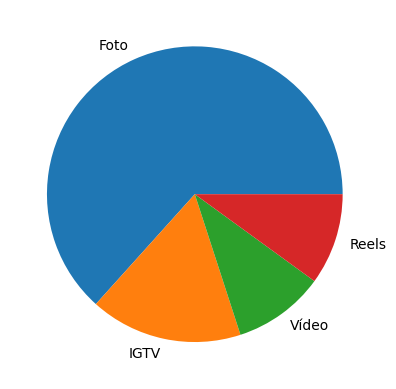

In [ ]:
df["Tipo"].value_counts().plot(kind="pie",ylabel="")

In [ ]:
# A media por tipo
df.groupby("Tipo")["Curtidas"].mean()

,Curtidas
Tipo,
Foto,"13,341.14"
IGTV,"6,833.40"
Reels,"14,873.00"
Vídeo,"8,141.50"


- **Nesse caso pode parecer que vídeo e IGTV são estratégias ruins que não devem ser usadas**

**Inclusive é possível agregar por mais de 1 coluna:** <br>

In [ ]:
# Agrupando por Tipo e Pessoas
df.groupby(["Tipo","Pessoas"])["Curtidas"].mean()

Tipo   Pessoas
Foto   N          3,863.50
       S         15,236.67
IGTV   S          6,833.40
Reels  N          5,934.50
       S         20,832.00
Vídeo  N          4,007.50
       S         16,409.50
Name: Curtidas, dtype: float64

**E também aplicar a função de agregação em várias outras colunas:** <br>

In [ ]:
df.groupby(["Tipo","Pessoas"])[["Curtidas",'Comentários']].mean()

Curtidas  Comentários
Tipo  Pessoas                       
Foto  N        3,863.50        29.50
      S       15,236.67       226.20
IGTV  S        6,833.40       133.60
Reels N        5,934.50        98.00
      S       20,832.00       342.00
Vídeo N        4,007.50        65.25
      S       16,409.50       370.00

In [ ]:
# Incluindo a coluna de campanhas
df.groupby(["Tipo","Pessoas","Campanhas"])[["Curtidas",'Comentários']].mean()


Curtidas  Comentários
Tipo  Pessoas Campanhas                       
Foto  N       N          2,869.00        20.50
              S          5,852.50        47.50
      S       N         10,815.29       159.93
              S         19,105.38       284.19
IGTV  S       N          6,833.40       133.60
Reels N       N          5,934.50        98.00
      S       N         12,894.00       249.00
              S         24,801.00       388.50
Vídeo N       N          4,007.50        65.25
      S       S         16,409.50       370.00

- O groupby já permite ver que publicações de campanha tem um grande engajamento e com foto de pessoas também

**Podemos então fazer os agrupamentos que acharmos melhor para entender os nossos dados**

In [ ]:
# Somente para pessoas
df.groupby("Pessoas")[["Curtidas","Comentários"]].mean()

,Curtidas,Comentários
Pessoas,,
N,"4,256.67",52.83
S,"14,664.55",230.50


<Axes: title={'center': 'Média de curtidas e comentarios com pessoas'}, xlabel='Pessoas', ylabel='Média'>

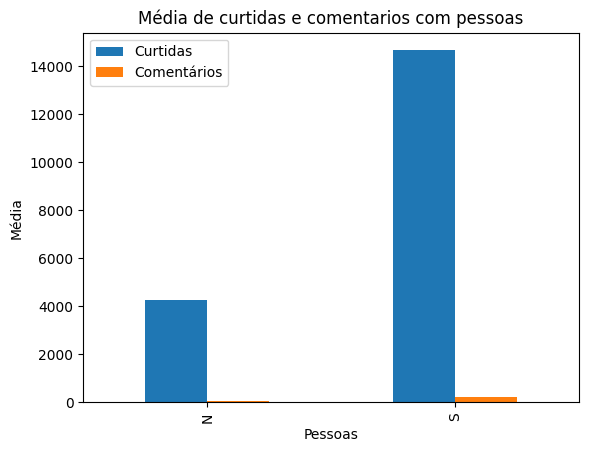

In [ ]:
df.groupby("Pessoas")[["Curtidas","Comentários"]].mean().plot(kind="bar",title="Média de curtidas e comentarios com pessoas",ylabel="Média")

- **Postagens com pessoas engajam muito mais para essa marca, sendo 3 vezes maior de quando não tem pessoas**

In [ ]:
# Somente para campanhas
df.groupby("Campanhas")[["Curtidas","Comentários"]].mean()


,Curtidas,Comentários
Campanhas,,
N,"7,928.33",123.17
S,"18,173.27",279.95


<Axes: title={'center': 'Média de curtidas e comentarios com campanha'}, xlabel='Campanhas', ylabel='Média'>

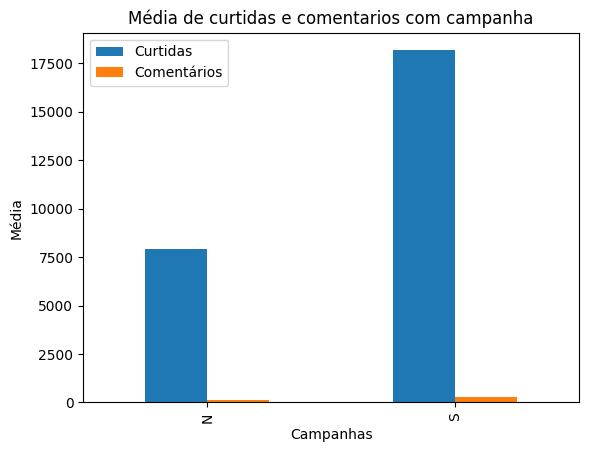

In [ ]:
df.groupby("Campanhas")[["Curtidas","Comentários"]].mean().plot(kind="bar",title="Média de curtidas e comentarios com campanha",ylabel="Média")

- **Quando é uma postagem de campanha, o engajamento também é melhor!**

In [ ]:
# Podemos também  fazer uma filtragem na base, porque carrossel so tem em foto
df[df.Tipo=='Foto'].groupby("Carrossel")[["Curtidas","Comentários"]].mean()


,Curtidas,Comentários
Carrossel,,
N,"13,776.36",208.57
S,"11,817.88",140.38


- **A média sem usar carrossel é melhor do que quando usamos, então não é algo que possa impactar tanto no resultado das mídias dessa empresa olhando inicialmente**


**Colocando pessoas e campanhas juntos podemos ver como se dá essa diferença**

In [ ]:
# Agregando por pessoas e campanhas
df.groupby(["Pessoas","Campanhas"])[["Curtidas","Comentários"]].mean()

Curtidas  Comentários
Pessoas Campanhas                       
N       N          3,937.50        53.90
        S          5,852.50        47.50
S       N          9,923.75       157.80
        S         19,405.35       303.20

- **A média quando tem pessoas E é publicação de campanhas é de cerca de 19,4 mil curtidas, já quando é apenas pessoas (sem campanha passa para quase 10 mil e se não tiver pessoas chega no máximo a 5,9 mil mesmo em campanhas**
<br><br>
- **Nesse caso a gente já consegue mostrar para a empresa a importância de incluir pessoas usando os seus produtos, o que gera um aumento considerável no engajamento**

In [ ]:
# Agregando por pessoas, campanhas e tipo
df.groupby(["Pessoas","Campanhas","Tipo"])[["Curtidas","Comentários"]].mean()


Curtidas  Comentários
Pessoas Campanhas Tipo                        
N       N         Foto   2,869.00        20.50
                  Reels  5,934.50        98.00
                  Vídeo  4,007.50        65.25
        S         Foto   5,852.50        47.50
S       N         Foto  10,815.29       159.93
                  IGTV   6,833.40       133.60
                  Reels 12,894.00       249.00
        S         Foto  19,105.38       284.19
                  Reels 24,801.00       388.50
                  Vídeo 16,409.50       370.00

- **Analisando novamente a questão do vídeo, ele não parece mais tão ruim assim. Quando feito em campanha e usando pessoas ele teve um resultado bom, inclusive próximo a foto**
- O que poderia ter levado a média baixa é que só temos vídeo ou COM pessoa e COM campanha ou sem nenhum dos dois. Não temos nenhum vídeo com apenas um dos dois (pessoa ou campanha)
- Já IGTV, mesmo tendo pessoa, não teve um resultado tão bom

#### Inclusive podemos entender o que havia gerado a média baixo no vídeo

In [ ]:
# Vamos filtrar a base apenas onde o tipo é Vídeo
df[df.Tipo=="Vídeo"]

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164
9,Vídeo,2021-09-28,4056,81,Produtos,N,N,N,4137
15,Vídeo,2021-11-04,3646,71,Produtos,N,N,N,3717
17,Vídeo,2021-11-09,3213,60,Produtos,N,N,N,3273
24,Vídeo,2021-12-30,17600,383,Trends,S,S,N,17983
37,Vídeo,2022-02-13,15219,357,Datas comemorativas,S,S,N,15576


- **Aqui percebemos que a loja tentou postar 4 vídeos mostrando seus produtos (sem nenhuma pessoa) e o resultado foi baixo. Quando o vídeo foi feito com pessoas aproveitando trends e datas comemorativas o resultado foi muito bom!**

## ✅ Conclusões
- **Em uma análise inicial, postagens incluindo pessoas engajam muito mais que aquelas que não possui ninguém**
- **Postagens em épocas de campanha também possuem um melhor engajamento**
- **Nessa base, o carrossel não foi um diferencial para melhorar o engajamento da marca**

# Analisando as Tags
### O que queremos responder?
- Qual a tag mais engaja nessas publicações?
    - Agora queremos olhar apenas tags
<br><br>
- Ele também dá alguns direcionamentos:
    - Podem ignorar a coluna visualizações, queremos entender apenas curtidas, comentários e interações
    - Tags vazias é que realmente não possuem tag (favor tratar como vazio ou colocar "Sem tag")

In [ ]:
df.groupby("Tags")["Curtidas"].mean().sort_values(ascending=False)

,Curtidas
Tags,
Datas comemorativas/Promoções,"29,084.00"
Promoções,"26,645.50"
Trends,"22,400.67"
Datas comemorativas,"17,975.00"
Influenciadores,"15,197.29"
Trends/Produtos,"12,894.00"
Novos Produtos,"11,619.57"
Dicas de como usar/Produtos,"7,586.67"
Dicas de como usar/Novos Produtos,"5,703.50"


### Para conseguir analisar separadamente as tags, podemos dividir linhas com 2 tags em 2 linhas
- Para isso primeiro vamos usar o split para separar em uma lista com as tags
- Depois vamos usar o explode para transformar as listas com 2 tags em 2 linhas diferentes

In [ ]:
#Vamos usar isso para a coluna Tag
#transformando a coluna Tag em em uma lista de tags
df["Tags"]=df["Tags"].str.split("/")

In [ ]:
df.head(20)

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,[Loja],N,N,N,2874
1,Foto,2021-09-11,2930,28,"[Loja, Produtos]",N,N,N,2958
2,Foto,2021-09-11,2807,9,[Loja],N,N,N,2816
3,Vídeo,2021-09-12,5115,49,[Produtos],N,N,N,5164
4,Foto,2021-09-13,4392,45,[Produtos],S,N,N,4437
5,Foto,2021-09-17,5359,62,[Novos Produtos],N,S,S,5421
6,Foto,2021-09-19,21597,852,[Novos Produtos],S,S,N,22449
7,Foto,2021-09-25,6346,33,[Produtos],N,S,N,6379
8,Foto,2021-09-27,6355,89,[Produtos],S,N,S,6444
9,Vídeo,2021-09-28,4056,81,[Produtos],N,N,N,4137


**O explode vai separar uma coluna de um DataFrame em 1 linha para cada elemento da lista**

In [ ]:
#Usando o explode para separar as Tags
df=df.explode("Tags")

In [ ]:
df.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
1,Foto,2021-09-11,2930,28,Loja,N,N,N,2958
1,Foto,2021-09-11,2930,28,Produtos,N,N,N,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164


### Fazendo a mesma análise de antes, mas agora a média por tag

**Aviso importante: muito cuidado pois as outras colunas serão duplicadas, então não podemos fazer o mesmo cálculo de média que estávamos fazendo**
<br><br>



In [ ]:
df.groupby("Pessoas")["Curtidas"].mean()#errado

,Curtidas
Pessoas,
N,"4,154.62"
S,"14,100.57"


**Só vamos fazer as análises que envolve tag depois de fazer isso com a base**

In [ ]:
df["Tags"].value_counts()

,count
Tags,
Produtos,17
Novos Produtos,9
Influenciadores,7
Dicas de como usar,5
Datas comemorativas,4
Trends,4
Loja,3
Promoções,3


In [ ]:
df.groupby("Tags")[["Curtidas","Comentários"]].mean().sort_values(by="Curtidas",ascending=False)

,Curtidas,Comentários
Tags,,
Promoções,"27,458.33",531.00
Datas comemorativas,"20,752.25",343.50
Trends,"20,024.00",352.25
Influenciadores,"15,197.29",161.71
Novos Produtos,"10,304.89",198.56
Dicas de como usar,"6,833.40",133.60
Produtos,"6,269.82",94.12
Loja,"2,865.00",17.67


- **Postagens de promoções são as que mais engajam**
- **Além de promoções, datas comemorativas e trends também possuem um bom engajamento**

**E o que está sem tag?**

In [ ]:
#Filtrando por valores nulos na coluna Tags
df[df["Tags"].isnull()]

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
11,Foto,2021-10-12,17831,391,NaN,S,S,N,18222
19,Foto,2021-12-12,16086,268,NaN,S,S,N,16354
29,Foto,2022-01-19,8612,142,NaN,S,N,N,8754
38,Foto,2022-02-15,17687,213,NaN,S,N,N,17900
41,Foto,2022-02-22,12530,90,NaN,S,N,N,12620
43,Foto,2022-03-04,24399,266,NaN,S,S,N,24665
49,Foto,2022-03-22,9087,106,NaN,S,S,N,9193
50,Foto,2022-03-26,16551,186,NaN,S,N,N,16737


**Da mesma forma que fizemos para Carrossel, poderíamos ter feito para as tags escrevendo "Sem tag" ou "Nao tem tag" algo assim, e nesse caso iria aparecer no groupby**

In [ ]:
# Atribuindo esse texto "sem tag" para a coluna tag, onde os valores sao nulos.
df["Tags"] = df["Tags"].fillna("Sem tag")


In [ ]:
# Mostrando as colunas alterada
df[df["Tags"]=="Sem tag"]

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
11,Foto,2021-10-12,17831,391,Sem tag,S,S,N,18222
19,Foto,2021-12-12,16086,268,Sem tag,S,S,N,16354
29,Foto,2022-01-19,8612,142,Sem tag,S,N,N,8754
38,Foto,2022-02-15,17687,213,Sem tag,S,N,N,17900
41,Foto,2022-02-22,12530,90,Sem tag,S,N,N,12620
43,Foto,2022-03-04,24399,266,Sem tag,S,S,N,24665
49,Foto,2022-03-22,9087,106,Sem tag,S,S,N,9193
50,Foto,2022-03-26,16551,186,Sem tag,S,N,N,16737


<Axes: ylabel='Média'>

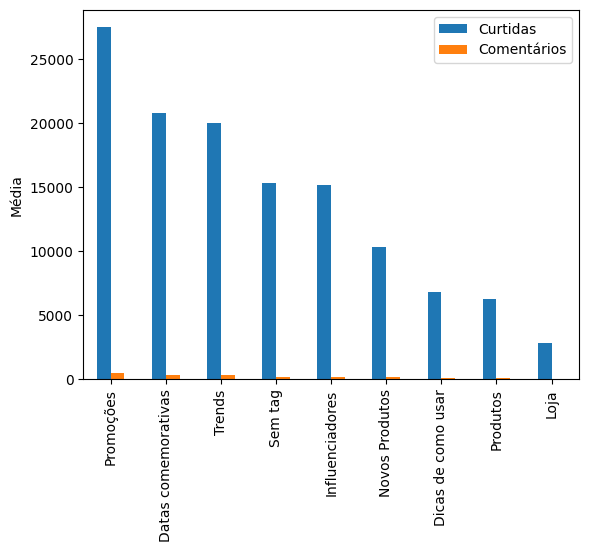

In [ ]:
#Mostrando novamente a tabela de curtidas por Tag
df.groupby("Tags")[["Curtidas","Comentários"]].mean().sort_values(by="Curtidas",ascending=False).plot(kind="bar",ylabel="Média",xlabel="")


In [ ]:
#media de pessoas por tags
df.groupby(["Pessoas","Tags"])[["Curtidas","Comentários"]].mean().sort_values(by="Curtidas",ascending=False)

Curtidas  Comentários
Pessoas Tags                                      
S       Promoções           27,458.33       531.00
        Datas comemorativas 20,752.25       343.50
        Trends              20,024.00       352.25
        Sem tag             15,347.88       207.75
        Influenciadores     15,197.29       161.71
        Novos Produtos      10,923.12       215.62
        Produtos             8,316.38       131.62
        Dicas de como usar   6,833.40       133.60
N       Novos Produtos       5,359.00        62.00
        Produtos             4,450.67        60.78
        Loja                 2,865.00        17.67

### Depois de analisarmos esses resultados
 percebemos que a pessoa influencia muito no engajamento das publicações,com exceção dos (**Produtos e dicas de como usar**)  que apresentam médias semelhantes a tags que nao tem pessoa.






In [ ]:
df.groupby(["Campanhas","Tags"])[["Curtidas","Comentários"]].mean().sort_values(by="Curtidas",ascending=False)


Curtidas  Comentários
Campanhas Tags                                      
S         Promoções           33,217.50       490.50
          Trends              22,400.67       386.67
          Datas comemorativas 20,752.25       343.50
          Influenciadores     18,715.40       197.60
          Sem tag             16,850.75       257.75
N         Promoções           15,940.00       612.00
          Sem tag             13,845.00       157.75
          Trends              12,894.00       249.00
S         Novos Produtos      11,040.67       323.00
N         Novos Produtos       9,937.00       136.33
S         Produtos             9,074.00        67.50
N         Dicas de como usar   6,833.40       133.60
          Influenciadores      6,402.00        72.00
          Produtos             5,895.93        97.67
          Loja                 2,865.00        17.67

## ✅ **Conclusões**
- **Ter o rosto de outras pessoas é fundamental para um bom engajamento na publicação**
    - Em todas as tags, quando havia o rosto, o resultado foi muito melhor
- **Criar campanhas ajuda muito na divulgação da marca**
- **Promoções tiveram um desempenho absurdamente maior que qualquer outra tag**
    - Porém é uma tag que pode ter custo para a loja, o que deve ser analisado
- **Usar conteúdos que estão em trend também ajudam na divulgação da marca, mesmo a trend sendo de outros nichos**
- **A melhor maneira de mostrar produtos é através de outras pessoas utilizando-os, e se possível em campanhas de datas especiais**
- **Para novos produtos a inclusão de pessoas é mais crítica ainda, sendo quase o dobro quando há um rosto junto ao produto**
- **Não podemos afirmar que a tag `Loja` é ruim até testarmos essa tag incluindo pessoas ou em uma campanha. Vale o teste para verificar**
-**Verificar o porque de ter algumas tags com "Sem tag", se nao ha alguma semelhancia com as tag ja fornecida**